1.1.2


In [2]:
# Вычисляет качество хромосомы, используя заданную формулу.
# Чем больше значение, тем "лучше" хромосома.
def qZ(x, y):
    return (x - 2 * y - 3) / (x ** 2 + 3 * y ** 2 + 1)

# Функция для суммирования качеств всех хромосом
def qSumZ(Z):
    return sum(Z)

# Перестраивает массивы X и Y на основе упорядоченных индексов.
#Сохраняет и размножает лучшие хромосомы.
def exchangeScheme(oldX, oldY, sortedId):

    # Инициализация новых массивов
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    # Лучшая хромосома копируется 2 раза
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    # Остальные хромосомы добавляются по порядку
    X[0] = oldX[sortedId[0]]
    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]
    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

# Функция сортировки индексов массива Z
def sorting(Z):
    sortedId = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedId

# Один шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))  # Находим индекс минимального качества
    X = X[:]
    Y = Y[:]
    Z = Z[:]
    X.pop(minId)  # Удаляем худшую хромосому из массива X
    Y.pop(minId)  # Удаляем соответствующую хромосому из Y
    Z.pop(minId)  # Удаляем её качество

    return X, Y, Z

# Множественные шаги эволюции
def evoSteps(X, Y, stepsNum=4):
    results = []

    for i in range(stepsNum):
        # 1. Вычисляем качества хромосом
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        # 2. Удаляем худшую хромосому
        X, Y, Z = evoStep(X, Y, arrZ)

        # 3. Перестраиваем массивы X и Y по схеме обмена
        X, Y = exchangeScheme(X, Y, sorting(Z))

        # 4. Сохраняем результаты текущего шага
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

X = [-4, -2, 0, 2]
Y = [-1, 1, 0, -2]

results = evoSteps(X, Y)

# Вывод максимального качества на каждом шаге
for i in range(len(results[2])):
    print(f"max_{i + 1}_step: {results[2][i][2]}")

# Определение глобального максимума качества
qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ.append(results[2][i][2])

print(f"max Z:    {max(qualityArrZ)}")


max_1_step: -3.948529411764706
max_2_step: -0.41227180527383367
max_3_step: -0.2720588235294117
max_4_step: 0.37449290060851925
max Z:    0.37449290060851925


1.2.2


Лучший выбранный маршрут: [1, 2, 4, 6, 3, 5, 1]
Длина лучшего выбранного маршрута: 169
Длины всех рассмотренных маршрутов: [165, 150, 165, 163, 169]


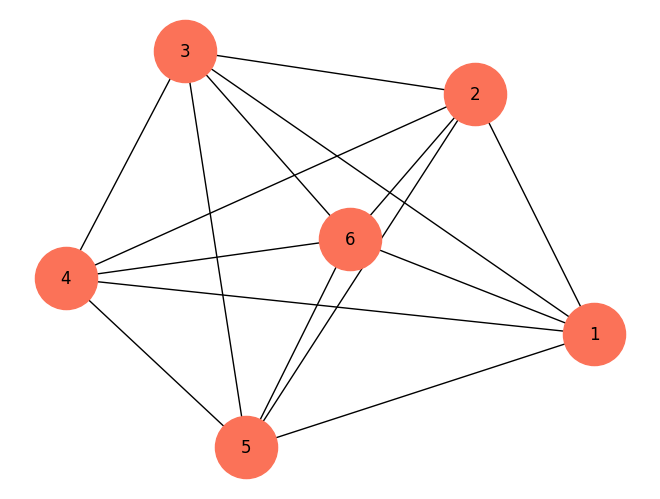

In [3]:
import networkx as nx
from math import e

distances = [(1, 2, 25),
             (1, 3, 41),
             (1, 4, 38),
             (1, 5, 27),
             (1, 6, 20),
             (2, 3, 21),
             (2, 4, 34),
             (2, 5, 39),
             (2, 6, 17),
             (3, 4, 24),
             (3, 5, 40),
             (3, 6, 22),
             (4, 5, 21),
             (4, 6, 21),
             (5, 6, 22)] # длины ребер

V = [1, 3, 5, 4, 6, 2, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (2, 4)] # последовательность замен вершин
P = [41, 60, 85, 60] # случайные числа, выпавшие в процессе счета

T = 100 # начальная температура

# функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

# функция изменения температуры
def reductTemp(prevT):
  nextT = 0.5 * prevT
  return nextT

# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

# вычисление длины маршрута
def routeLength(V, distances):
  edges = []

  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i + 1], distances))

  return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName = True):
  decrement = 1 if replacementByName else 0

  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

  return arrV

# перестановки в пути
def routeReplacement(V, Z):
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        # в случае, если ращница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T)

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T) # вычисление температуры

    return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)


graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 130
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 165, 133, 149, 137, 145, 130, 162, 157, 148, 145, 162, 157, 148]


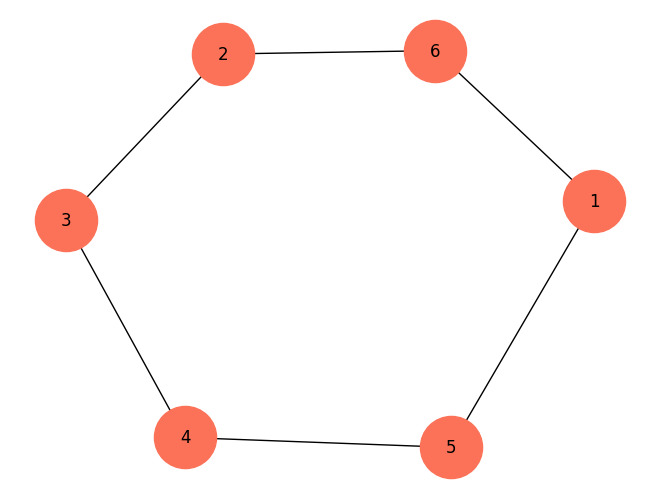

In [ ]:
import networkx as nx
from math import e

# Длины рёбер для второго графа
distances = [(1, 2, 25),
            (1, 3, 41),
            (1, 4, 38),
            (1, 5, 27),
            (1, 6, 20),
            (2, 3, 21),
            (2, 4, 34),
            (2, 5, 39),
            (2, 6, 17),
            (3, 4, 24),
            (3, 5, 40),
            (3, 6, 22),
            (4, 5, 21),
            (4, 6, 21),
            (5, 6, 22)]

V = [1, 3, 5, 4, 6, 2, 1]  # Последовательность прохождения маршрута
Z = [(3, 4), (4, 6), (5, 6), (2, 4)]  # Последовательность замен вершин
P = [41, 60, 85, 60]  # Случайные числа
T = 100  # Начальная температура


# функция вероятности
def probability(delta, T):
    return 100 * e ** (-delta / T)


# функция изменения температуры
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT


# вычисление длины ребра
def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (
                    item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])



# вычисление длины маршрута
def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)


# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P, stepsNum=4): # stepsNum добавлено
    sumLength = routeLength(V, distances)  # нахождение длины пути
    arrSum = [sumLength]  # массив сумм длин
    # циклы методом отжига
    for i in range(stepsNum): # используем stepsNum
        for j in range(len(Z)): # цикл по всем заменам в Z
            newV = routeOneReplacement(V[:], Z[j])  # новый маршрут после перестановки
            newS = routeLength(newV, distances)  # длина нового маршрута
            arrSum.append(newS)
            deltaS = newS - sumLength  # разница между длиной нового и старого маршрутов
            # в случае, если разница между длинами больше 0, то вычисляется вероятность
            if deltaS > 0:
                p = probability(deltaS, T)  # подсчёт вероятности
                # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выбирается
                if p > P[j]:
                    V = newV
                    sumLength = newS

            else:
                V = newV
                sumLength = newS
        T = reductTemp(T)  # вычисление температуры после каждой итерации i
    return V, arrSum


# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or \
                    distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()  # создание пустого графа
    graph.add_weighted_edges_from(newDistances)  # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)
    import matplotlib.pyplot as plt # для отображения графика
    plt.show()


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)  # отрисовка лучшего маршрута